<a href="https://colab.research.google.com/github/hitanshu5/Time-Series/blob/main/TSAEXP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
df = pd.read_csv(r'/content/FB (1).csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


In [ ]:
#Making a copy of the data for Close column for train/split
X = df['Close']
test = X.iloc[-30:] #Data expected for last 30 days
train = X.iloc[:-30] #Last 30 days to evaluate prediction

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') #how close a regression line is to a set of points.
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}') # average magnitude of the errors in a set of predictions.
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}') #square root of the avg of squared diff bet pred and actual obs
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}') #statistical measure of how accurate a forecast is.
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') #proportion of variance in dependent variable by the independent variable

In [ ]:
resu = []
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v = fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test, fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = pd.DataFrame({'smoothing parameter': [i], 'RMSE': [rmse]})
    temp_df = pd.concat([temp_df, df3], ignore_index=True)

temp_df.sort_values(by=['RMSE'], inplace=True)

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 14123.11196903136
MAE is : 118.76366943333332
RMSE is : 118.84069996861918
MAPE is : 60.79708542749399
R2 is : -770.6370351163115

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 130.19890782430633
MAE is : 10.578096050945016
RMSE is : 11.41047360210374
MAPE is : 5.371184257014935
R2 is : -6.113609198116427

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 108.84519758407878
MAE is : 9.515377334756147
RMSE is : 10.432890183648958
MAPE is : 4.826729569629682
R2 is : -4.946917770998036

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 101.81858360183577
MAE is : 9.13869749146715
RMSE is : 10.090519491177636
MAPE is : 4.633748018445831
R2 is : -4.563008361226736

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 101.76016636355348
MAE is : 9.135500785521595
RMSE is : 10.087624416261416
MAPE is : 4.632110274130487
R2 is : -4.55981664932594


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

# Simple Exponential Smoothing

In [ ]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 1.0,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 97.57797868071496
MAE is : 8.90366143333332
RMSE is : 9.878156643864024
MAPE is : 4.513333762437967
R2 is : -4.331316662144517



In [ ]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 97.68044511489337
MAE is : 8.90941374915351
RMSE is : 9.88334179895107
MAPE is : 4.51628080314019
R2 is : -4.336915066776707



In [ ]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,SimpleExpSmoothing,SSE,8965.774
Optimized:,True,AIC,2446.285
Trend:,None,BIC,2456.513
Seasonal:,None,AICC,2446.318
Seasonal Periods:,None,Date:,"Thu, 03 Oct 2024"
Box-Cox:,False,Time:,09:51:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9808446,alpha,True
initial_level,76.519997,l.0,False


In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(1229, 1259)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [ ]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(1229, 1259)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

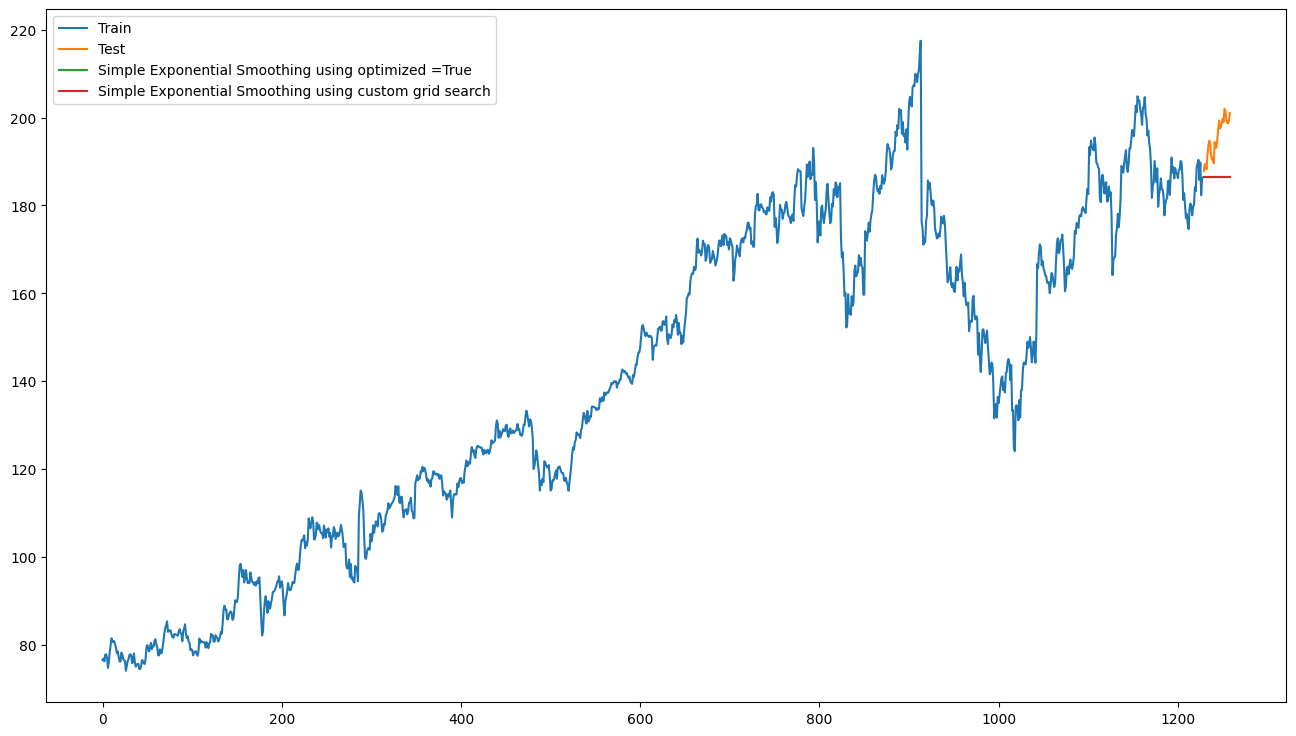

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

# Double Exponential Smoothing

In [ ]:
from sklearn.model_selection import ParameterGrid
#dampening - decreasing future time trends on a straight line(no trend)
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
from timeit import default_timer as timer
from statsmodels.tsa.holtwinters import Holt
import pandas as pd
import numpy as np
from sklearn import metrics  # Assuming you're using scikit-learn for RMSE and R2 calculations

# Initialize an empty DataFrame for storing results
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_trend', 'damping_trend', 'damped_trend', 'RMSE', 'r2'])

start = timer()

for a, b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_trend = b.get('smoothing_slope')  # Changed from smoothing_slope to smoothing_trend
    damping_trend = b.get('damping_slope')  # Changed from damping_slope to damping_trend
    damped_trend = b.get('damped')  # Changed from damped to damped_trend

    print(smoothing_level, smoothing_trend, damping_trend, damped_trend)

    # Fit the Holt model with the updated keywords
    fit1 = Holt(train, damped_trend=damped_trend).fit(smoothing_level=smoothing_level, smoothing_trend=smoothing_trend, damping_trend=damping_trend, optimized=False)

    z = fit1.forecast(30)
    print(z)

    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])

    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)

    print(f' RMSE is {RMSE}')

    # Use pd.concat() to add rows to df_results_moni
    df_new_row = pd.DataFrame({
        'smoothing_level': [smoothing_level],
        'smoothing_trend': [smoothing_trend],
        'damping_trend': [damping_trend],
        'damped_trend': [damped_trend],
        'RMSE': [RMSE],
        'r2': [r2]
    })

    df_results_moni = pd.concat([df_results_moni, df_new_row], ignore_index=True)

end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

0.1 0.1 0.1 True
1229    184.717490
1230    184.717692
1231    184.717712
1232    184.717714
1233    184.717714
1234    184.717714
1235    184.717714
1236    184.717714
1237    184.717714
1238    184.717714
1239    184.717714
1240    184.717714
1241    184.717714
1242    184.717714
1243    184.717714
1244    184.717714
1245    184.717714
1246    184.717714
1247    184.717714
1248    184.717714
1249    184.717714
1250    184.717714
1251    184.717714
1252    184.717714
1253    184.717714
1254    184.717714
1255    184.717714
1256    184.717714
1257    184.717714
1258    184.717714
dtype: float64
 RMSE is 11.39921926647149
0.1 0.2 0.1 True
1229    184.729601
1230    184.730001
1231    184.730041
1232    184.730045
1233    184.730046
1234    184.730046
1235    184.730046
1236    184.730046
1237    184.730046
1238    184.730046
1239    184.730046
1240    184.730046
1241    184.730046
1242    184.730046
1243    184.730046
1244    184.730046
1245    184.730046
1246    184.730046
1247    184.

<ipython-input-14-a01df43b4744>:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results_moni = pd.concat([df_results_moni, df_new_row], ignore_index=True)


Streaming output truncated to the last 5000 lines.
1245    201.132689
1246    201.877914
1247    202.623138
1248    203.368363
1249    204.113588
1250    204.858813
1251    205.604038
1252    206.349263
1253    207.094487
1254    207.839712
1255    208.584937
1256    209.330162
1257    210.075387
1258    210.820612
dtype: float64
 RMSE is 5.708272613337477
0.2 0.3 0.8 False
1229    190.711524
1230    191.318315
1231    191.925107
1232    192.531899
1233    193.138690
1234    193.745482
1235    194.352274
1236    194.959065
1237    195.565857
1238    196.172649
1239    196.779440
1240    197.386232
1241    197.993024
1242    198.599815
1243    199.206607
1244    199.813399
1245    200.420190
1246    201.026982
1247    201.633773
1248    202.240565
1249    202.847357
1250    203.454148
1251    204.060940
1252    204.667732
1253    205.274523
1254    205.881315
1255    206.488107
1256    207.094898
1257    207.701690
1258    208.308482
dtype: float64
 RMSE is 4.824344826728742
0.2 0.4 0.8

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_trend,damping_trend,damped_trend,RMSE,r2
806,0.9,0.6,0.1,False,2.176486,0.741182


In [ ]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)

<ipython-input-16-044bbc57093f>:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)
<ipython-input-16-044bbc57093f>:1: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: FutureWarning: the 'damping_slope' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)


In [ ]:
Forecast_custom_pred = fit1.forecast(30)

In [ ]:
fit1.summary()

Dep. Variable:,Close,No. Observations:,1229
Model:,Holt,SSE,12220.966
Optimized:,False,AIC,2830.954
Trend:,Additive,BIC,2851.410
Seasonal:,None,AICC,2831.023
Seasonal Periods:,None,Date:,"Thu, 03 Oct 2024"
Box-Cox:,False,Time:,09:52:11
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.6000000,beta,False


In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 4.737090445686715
MAE is : 1.8121525217302623
RMSE is : 2.1764858018573694
MAPE is : 0.9266024548104875
R2 is : 0.7411820826314525



In [ ]:
# Automated Parameter
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

Dep. Variable:,Close,No. Observations:,1229
Model:,Holt,SSE,8984.644
Optimized:,True,AIC,2452.869
Trend:,Additive,BIC,2473.325
Seasonal:,None,AICC,2452.938
Seasonal Periods:,None,Date:,"Thu, 03 Oct 2024"
Box-Cox:,False,Time:,09:52:11
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9811694,alpha,True
smoothing_trend,0.0018245,beta,True


In [ ]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 66.62567955542858
MAE is : 7.363634639855377
RMSE is : 8.162455485662912
MAPE is : 3.7330834259307895
R2 is : -2.6401921862187425



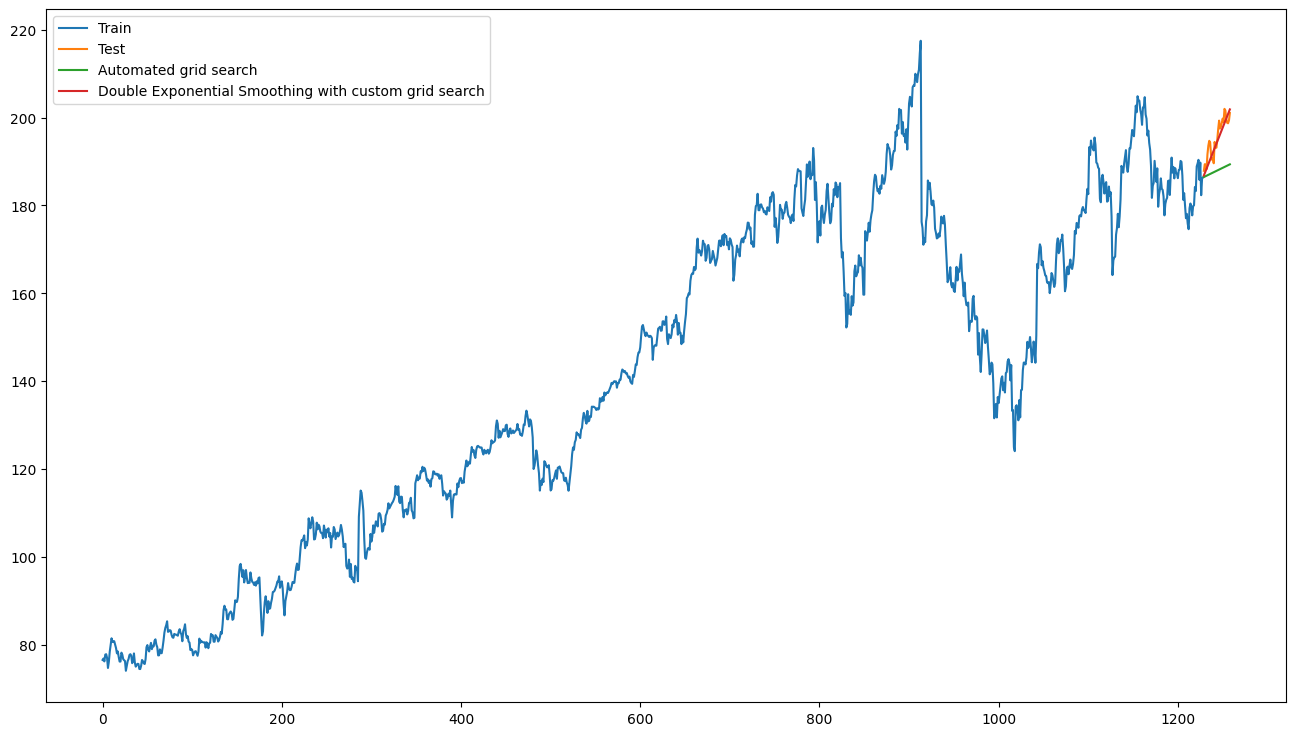

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

# Triple Exponential Smoothing

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {'trend': ['add', 'mul'],'seasonal' :['add', 'mul'],'seasonal_periods':[3,6,12], 'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False], 'use_boxcox':[True, False],
             'remove_bias':[True, False],'use_basinhopping':[True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
from timeit import default_timer as timer
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
from joblib import Parallel, delayed

# Initialize the DataFrame for storing results
df_results_moni = pd.DataFrame(columns=['trend', 'seasonal_periods', 'smoothing_level', 'smoothing_slope',
                                        'damping_slope', 'damped', 'use_boxcox', 'remove_bias', 'method', 'RMSE', 'r2'])

# Early stopping parameters
best_rmse = float('inf')
no_improvement_count = 0
max_no_improvement = 5  # Stop if no improvement after 5 iterations
max_iterations = 20  # Limit total iterations

start = timer()
print('Starting Optimized Grid Search..')

# Define a function to process a single parameter combination
def process_combination(b):
    global best_rmse, no_improvement_count

    trend = b.get('trend')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    use_boxcox = b.get('use_boxcox')
    remove_bias = b.get('remove_bias')
    method = b.get('method', 'L-BFGS-B')  # Default optimization method

    try:
        # Fit the Exponential Smoothing model
        fit1 = ExponentialSmoothing(train, trend=trend, damped_trend=damped, seasonal_periods=seasonal_periods, use_boxcox=use_boxcox).fit(
            smoothing_level=smoothing_level,
            smoothing_trend=smoothing_slope,
            damping_trend=damping_slope,
            remove_bias=remove_bias,
            optimized=False,
            method=method
        )

        # Forecast for 30 periods
        z = fit1.forecast(30)

        # Store the forecasted results in a DataFrame
        df_pred = pd.DataFrame(z, columns=['Forecasted_result'])

        # Calculate RMSE and R2
        RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
        r2 = metrics.r2_score(test, df_pred.Forecasted_result)

        return {
            'trend': trend,
            'seasonal_periods': seasonal_periods,
            'smoothing_level': smoothing_level,
            'smoothing_slope': smoothing_slope,
            'damping_slope': damping_slope,
            'damped': damped,
            'use_boxcox': use_boxcox,
            'remove_bias': remove_bias,
            'method': method,
            'RMSE': RMSE,
            'r2': r2
        }

    except Exception as e:
        # Print error and return None for this iteration
        print(f"Error with parameters {b}: {e}")
        return None

# Use joblib for parallel processing
results = Parallel(n_jobs=-1)(delayed(process_combination)(b) for a, b in enumerate(pg[:max_iterations]))

# Filter out failed iterations (None results) and add successful results to DataFrame
for result in results:
    if result is not None:
        df_results_moni = pd.concat([df_results_moni, pd.DataFrame([result])])

# Early stopping check and improvement tracking
if not df_results_moni.empty:
    if df_results_moni['RMSE'].min() < best_rmse:
        best_rmse = df_results_moni['RMSE'].min()
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= max_no_improvement:
        print("Stopping early due to no improvement.")
else:
    print("No valid results obtained.")

end = timer()
print(f'Total time taken to complete grid search in seconds: {(end - start)}')

# Print the results
print(df_results_moni)

Starting Optimized Grid Search..
Total time taken to complete grid search in seconds: 2.3048538839993853
  trend seasonal_periods  smoothing_level  smoothing_slope  damping_slope  \
0   add                3              0.1              0.1            0.1   
0   add                3              0.1              0.1            0.1   
0   add                3              0.1              0.1            0.1   
0   add                3              0.1              0.1            0.1   
0   mul                3              0.1              0.1            0.1   
0   mul                3              0.1              0.1            0.1   
0   mul                3              0.1              0.1            0.1   
0   mul                3              0.1              0.1            0.1   
0   add                3              0.1              0.2            0.1   
0   add                3              0.1              0.2            0.1   
0   add                3              0.1       

<ipython-input-27-7e82b80b880e>:81: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results_moni = pd.concat([df_results_moni, pd.DataFrame([result])])


In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


,trend,seasonal_periods,smoothing_level,smoothing_slope,damping_slope,damped,use_boxcox,remove_bias,method,RMSE,r2
0,add,3,0.1,0.3,0.1,True,False,True,L-BFGS-B,10.588481,-5.125619


In [ ]:
df_results_moni.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 0
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trend             20 non-null     object 
 1   seasonal_periods  20 non-null     object 
 2   smoothing_level   20 non-null     float64
 3   smoothing_slope   20 non-null     float64
 4   damping_slope     20 non-null     float64
 5   damped            20 non-null     object 
 6   use_boxcox        20 non-null     object 
 7   remove_bias       20 non-null     object 
 8   method            20 non-null     object 
 9   RMSE              20 non-null     float64
 10  r2                20 non-null     float64
dtypes: float64(5), object(6)
memory usage: 1.9+ KB


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Exponential Smoothing model with corrected parameters
fit1 = ExponentialSmoothing(
    train,
    trend='mul',
    damped_trend=False,  # Use damped_trend instead of damped
    seasonal_periods=3,
    use_boxcox=False  # Set this parameter only here
).fit(
    smoothing_level=0.9,
    smoothing_trend=0.6,  # Use smoothing_trend instead of smoothing_slope
    damping_trend=0.6,    # Use damping_trend instead of damping_slope
    optimized=False  # Keep optimized as False if you want to specify smoothing values
)

# Forecast for the next 30 periods
Forecast_custom_pred = fit1.forecast(30)

# Get the model summary
fit1_summary = fit1.summary()

# Display forecast and summary
print(Forecast_custom_pred)
print(fit1_summary)

1229    186.851641
1230    187.393114
1231    187.936157
1232    188.480772
1233    189.026966
1234    189.574743
1235    190.124108
1236    190.675064
1237    191.227617
1238    191.781771
1239    192.337531
1240    192.894901
1241    193.453887
1242    194.014492
1243    194.576723
1244    195.140582
1245    195.706075
1246    196.273207
1247    196.841983
1248    197.412407
1249    197.984484
1250    198.558218
1251    199.133616
1252    199.710680
1253    200.289417
1254    200.869831
1255    201.451927
1256    202.035710
1257    202.621185
1258    203.208356
dtype: float64
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                 1229
Model:             ExponentialSmoothing   SSE                          12070.232
Optimized:                        False   AIC                           2815.701
Trend:                   Multiplicative   BIC                           2836.157
Seasonal: 

In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 4.675431534981659
MAE is : 1.789253179284401
RMSE is : 2.162274620620993
MAPE is : 0.9154984217657042
R2 is : 0.7445509080821944



In [ ]:
# Fitting model with optimized =True
fitESAUTO = ExponentialSmoothing(train).fit(optimized= True, use_brute = True)

In [ ]:
fitESAUTO.summary()

Dep. Variable:,Close,No. Observations:,1229
Model:,ExponentialSmoothing,SSE,8965.774
Optimized:,True,AIC,2446.285
Trend:,None,BIC,2456.513
Seasonal:,None,AICC,2446.318
Seasonal Periods:,None,Date:,"Thu, 03 Oct 2024"
Box-Cox:,False,Time:,11:05:37
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9808450,alpha,True
initial_level,76.525884,l.0,True


In [ ]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 97.6804426274572
MAE is : 8.909413609557555
RMSE is : 9.883341673111236
MAPE is : 4.516280731622044
R2 is : -4.3369149308719654



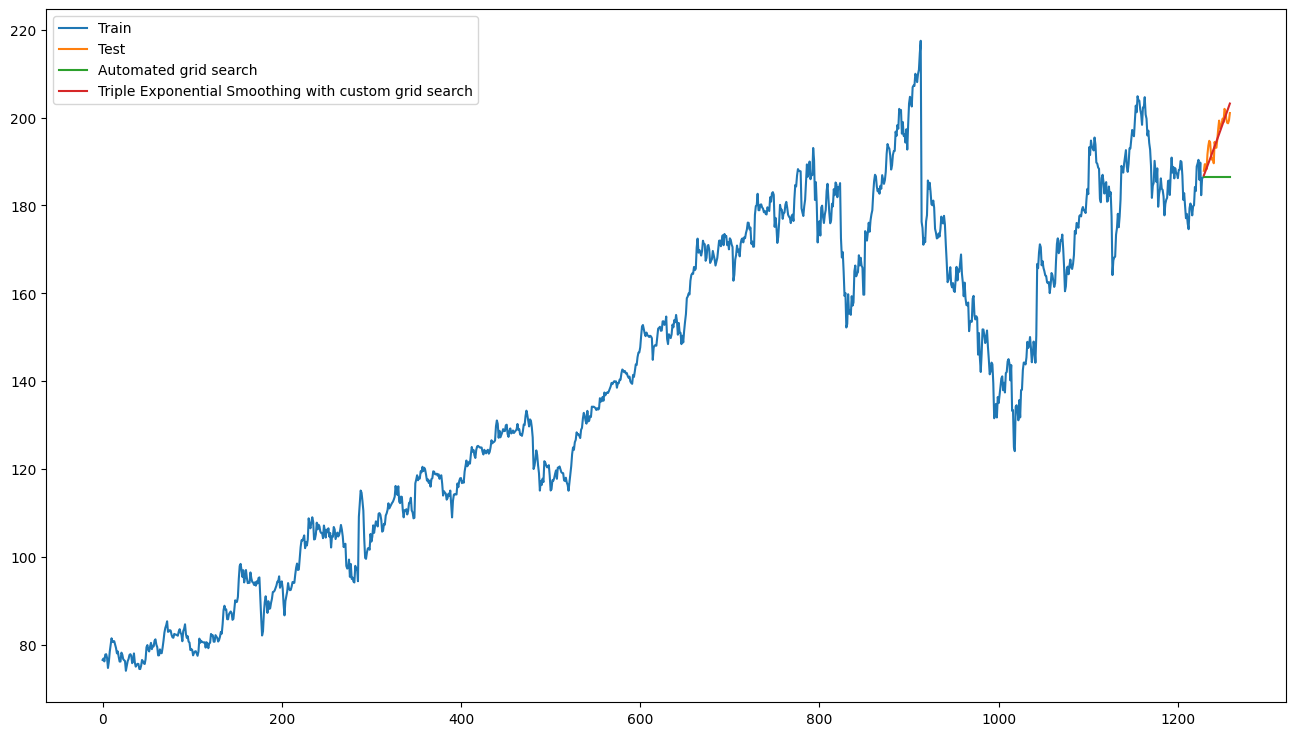

In [ ]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Triple Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()